In [42]:
import pandas as pd
import os
import glob

df = pd.read_csv('/content/inputforlstm.csv')

df

,date,fpi cash,fpi index futures values,fpistock futures value,dii stock future,dii index future,OI PCR
0,17-Apr-2023,-90.229469,-90.229469,-80.050725,-73.229248,78.917938,0.920781
1,13-Apr-2023,150.928744,150.927536,-2.084541,71.292444,-185.665533,1.122671
2,12-Apr-2023,202.131643,202.130435,178.193237,72.126373,-78.979246,1.180173
3,11-Apr-2023,264.910628,264.909420,133.286232,0.240146,-3.504826,1.112264
4,10-Apr-2023,223.320048,223.318841,94.102657,24.439737,-18.096904,0.854249
...,...,...,...,...,...,...,...
95,25-Nov-2022,NaN,-200.178744,NaN,NaN,32.289270,0.975251
96,24-Nov-2022,NaN,389.658213,NaN,NaN,21.252067,1.226573
97,23-Nov-2022,NaN,34.158213,NaN,NaN,-4.854698,0.921469
98,22-Nov-2022,NaN,183.737923,NaN,NaN,7.175329,0.894504


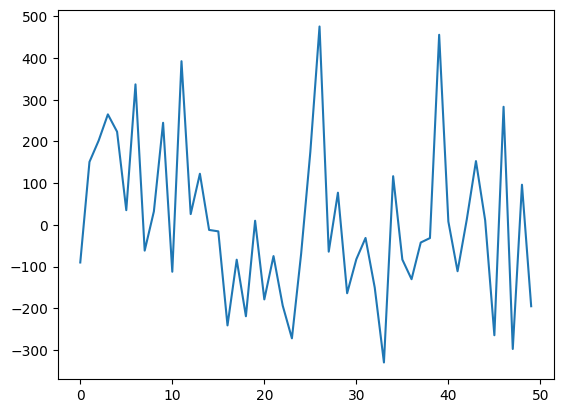

In [43]:
import matplotlib.pyplot as plt
# for i in range(0,5):
plt.plot(df.index, df['fpi cash'])

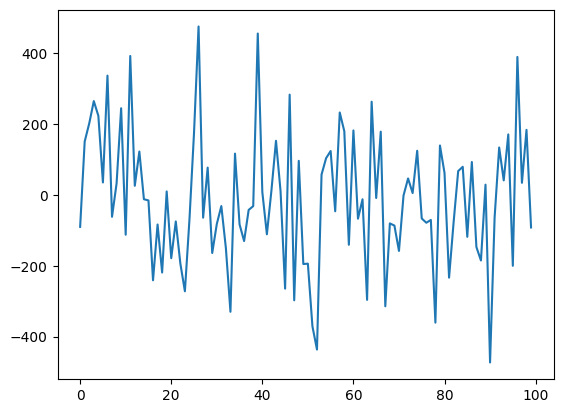

In [44]:

plt.plot(df.index, df['fpi index futures values'])

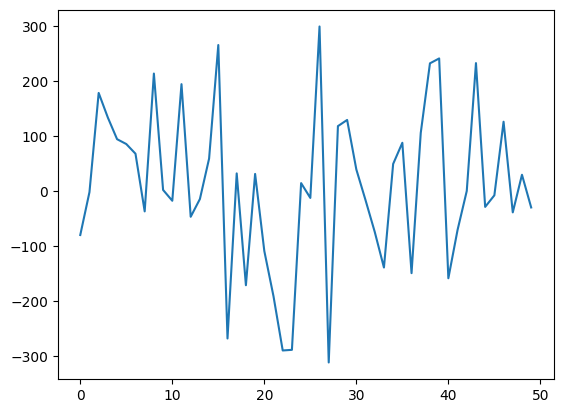

In [4]:

plt.plot(df.index, df['fpistock futures value'])

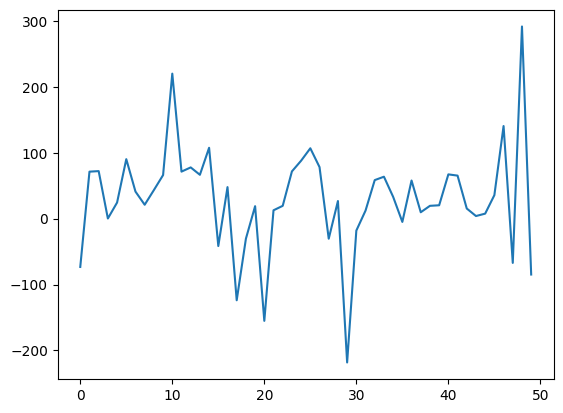

In [5]:

plt.plot(df.index, df['dii stock future'])

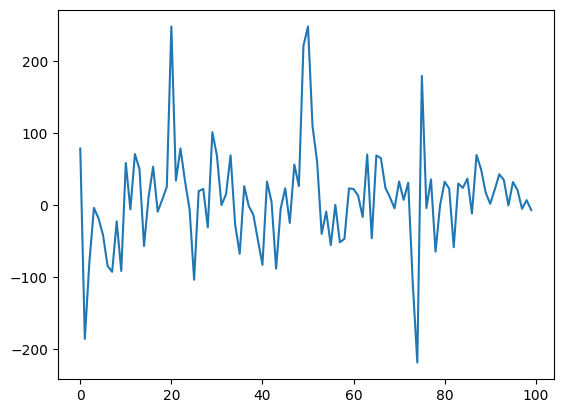

In [6]:

plt.plot(df.index, df['dii index future'])

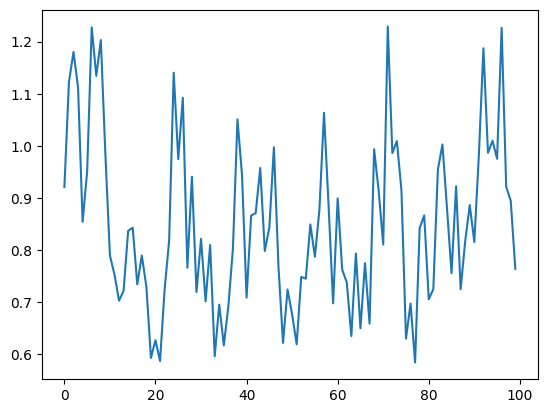

In [45]:

plt.plot(df.index, df['OI PCR'])

In [46]:
df_oipcr = df['OI PCR']
np_oipcr = df_oipcr.to_numpy()
np_oipcr

array([0.92078087, 1.12267074, 1.18017282, 1.1122637 , 0.85424869,
       0.95120726, 1.22748346, 1.13428941, 1.20301903, 0.98335984,
       0.78936958, 0.75297355, 0.7029458 , 0.72202326, 0.83696459,
       0.84288777, 0.73424118, 0.7895905 , 0.72961763, 0.59312016,
       0.6271701 , 0.58709933, 0.72416385, 0.81861212, 1.14039201,
       0.9744773 , 1.09230368, 0.76617301, 0.94078823, 0.71959652,
       0.82139193, 0.70172278, 0.80973523, 0.59606826, 0.69535048,
       0.6171183 , 0.69227979, 0.80269573, 1.05086356, 0.94382444,
       0.70878429, 0.86622901, 0.87097075, 0.95744535, 0.79818795,
       0.84357077, 0.99708941, 0.7687756 , 0.62186626, 0.72446018,
       0.67624462, 0.61915787, 0.74857964, 0.74511174, 0.84932639,
       0.78716143, 0.87851154, 1.06337454, 0.88655692, 0.69776763,
       0.89930145, 0.76211035, 0.73809793, 0.63491249, 0.79338677,
       0.6498238 , 0.77507509, 0.65879266, 0.99340692, 0.91415723,
       0.81062467, 1.22911869, 0.98624232, 1.00911149, 0.91465

In [47]:
# # applying filters

# XX_new = np.zeros((100,))
# for k in range(0,len(XX_new)):
#   avg = X_new[k]
#   avg_T = avg.T
#   bb = np.zeros((39,128))
#   for l in range(0,39):
#     capture = avg_T[l]
#     aa = np.zeros((128,1))
#     loc = 0
#     sum = 0;
#     for i in range(0,len(aa)):
      
#       # for j in range(loc,loc+5):
#       sum = sum + capture[i]
#       aa[i] = sum/(i+1)
#       loc = loc + 1
#     bb[l] = aa.reshape(128)
#   XX_new[k] = bb.T

lis = [] 
for i in range(3,len(np_oipcr)):
  # print(np_oipcr[i])
  sum = 0
  sum = sum + np_oipcr[i]+np_oipcr[i-1]+np_oipcr[i-2]+np_oipcr[i-3]
  print(sum/4)
  np_oipcr[i] = sum/4

# np_oipcr




1.0839720331107918
1.0602660705113218
1.0689045452428767
1.1101565274364935
1.0934041386812798
1.1188710609325765
1.0764478919042193
1.0195231683035018
0.991953918899555
0.9477176940324636
0.9203045095305543
0.9242351791614072
0.9087862884414764
0.8718917894935725
0.8736259383602587
0.8459804115756424
0.7961545744042282
0.7857327569527233
0.7537417684326979
0.7649482383156697
0.78075872183568
0.8599601858028045
0.8450361125551915
0.8945146753422202
0.8414209966702781
0.8804400037040114
0.8339930484823936
0.8443114949457561
0.8151168306533964
0.8257891504944166
0.7703214339639058
0.7766444733457337
0.7474683396955091
0.7466785098667365
0.7683717642595304
0.8283455427398385
0.8218050638019737
0.7818266643957023
0.8245515696886313
0.824788512250738
0.8471530241916662
0.8236702637190801
0.8347956420883716
0.8756770859634682
0.8257296472112602
0.7895171599490515
0.8038460187229459
0.7738343611348119
0.7465888523882585
0.7682122170556139
0.7584367925654447
0.7806410626468769
0.77361287444853

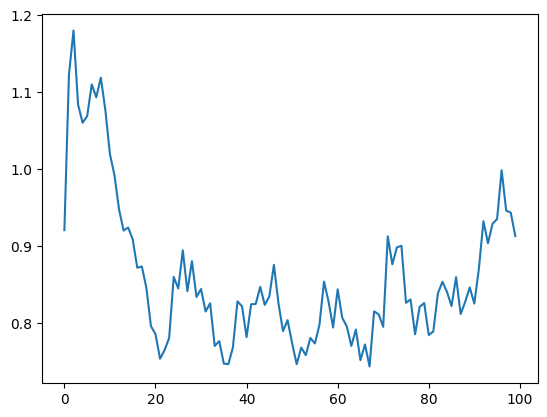

In [48]:
plt.plot(df.index, np_oipcr)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
X = []
y = []
x_ax = []
i = 0
while(i < len(np_oipcr)-1):
  temp_x = []
  # print(i)
  x_ax.append(i/5)
  temp_x.append(np_oipcr[i])
  temp_x.append(np_oipcr[i+1])
  temp_x.append(np_oipcr[i+2])
  temp_x.append(np_oipcr[i+3])
  X.append(temp_x)
  y.append(np_oipcr[i+4])
  i = i + 5

print('X_data')
X = np.array(X)
print(X.shape)
print('y_data')
y = np.array(y)
print(y.shape)

print(x_ax)


X_data
(20, 4)
y_data
(20,)
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0]


[[0.78457667 0.78922337 0.83850375 0.85374887]
 [0.82214329 0.85971152 0.81184234 0.8277031 ]
 [0.82534651 0.87045414 0.93238812 0.90371231]
 [0.93511314 0.99862478 0.94607698 0.94357983]] [0.84055424 0.84639105 0.92910105 0.91308887]


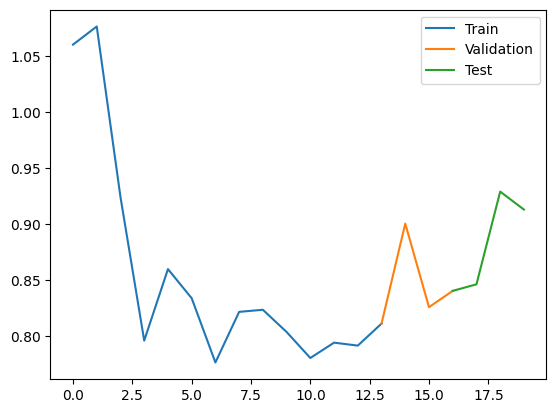

In [50]:
x_ax_train, X_train, y_train = x_ax[:14], X[:14], y[:14]

x_ax_val, X_val, y_val = x_ax[13:17], X[13:17], y[13:17]
x_ax_test, X_test, y_test = x_ax[16:], X[16:], y[16:]
print(X_test,y_test)
plt.plot(x_ax_train, y_train)
plt.plot(x_ax_val, y_val)
plt.plot(x_ax_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.6871 - mean_absolute_error: 0.8239 - val_loss: 0.5940 - val_mean_absolute_error: 0.7701
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 0.6107 - mean_absolute_error: 0.7766 - val_loss: 0.5478 - val_mean_absolute_error: 0.7395
Epoch 3/100
1/1 [==============================] - 0s 44ms/step - loss: 0.5617 - mean_absolute_error: 0.7447 - val_loss: 0.5074 - val_mean_absolute_error: 0.7117
Epoch 4/100
1/1 [==============================] - 0s 43ms/step - loss: 0.5191 - mean_absolute_error: 0.7159 - val_loss: 0.4649 - val_mean_absolute_error: 0.6812
Epoch 5/100
1/1 [==============================] - 0s 44ms/step - loss: 0.4744 - mean_absolute_error: 0.6843 - val_loss: 0.4214 - val_mean_absolute_error: 0.6486
Epoch 6/100
1/1 [==============================] - 0s 43ms/step - loss: 0.4287 - mean_absolute_error: 0.6503 - val_loss: 0.3783 - val_mean_absolute_error: 0.6145
Epoch 7/100
1/1 [=============

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 76,929
Trainable params: 76,929
Non-trainable params: 0
_________________________________________________________________


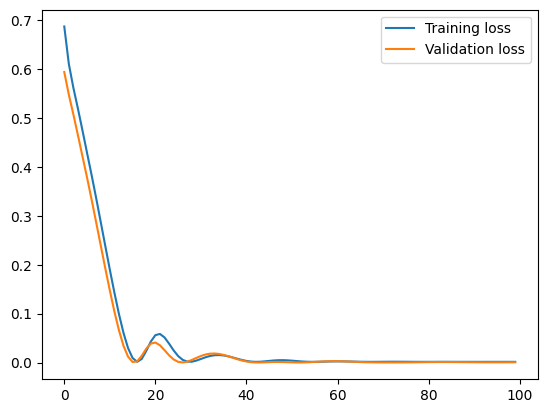

In [53]:
# import matplotlib.pyplot as plt
tr_loss = history.history['loss']
vr_loss = history.history['val_loss']
# mar_loss = history.history['mean_absolute_error']
# tr_loss
plt.plot(tr_loss)
plt.plot(vr_loss)
plt.legend(['Training loss', 'Validation loss'])

1/1 [==============================] - 0s 437ms/step


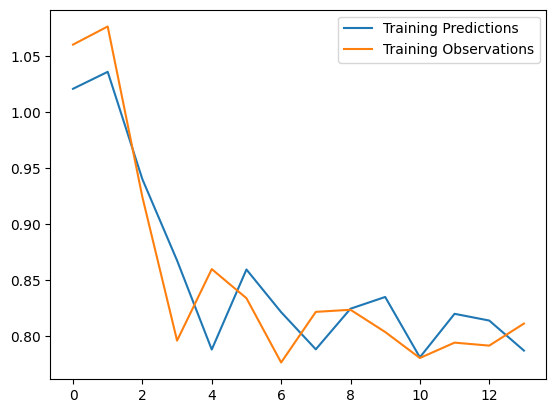

In [54]:
train_predictions = model.predict(X_train).flatten()

plt.plot(x_ax_train, train_predictions)
plt.plot(x_ax_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 23ms/step


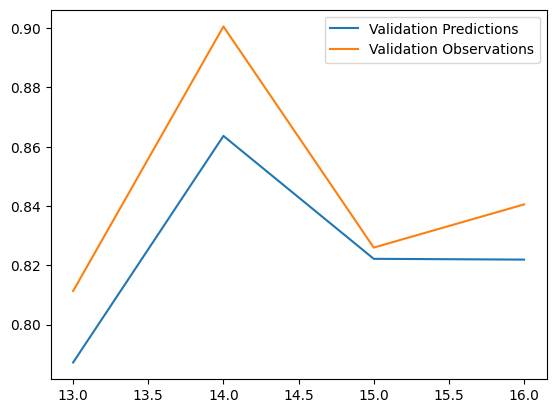

In [55]:
val_predictions = model.predict(X_val).flatten()

plt.plot(x_ax_val, val_predictions)
plt.plot(x_ax_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

(4, 4)
1/1 [==============================] - 0s 22ms/step


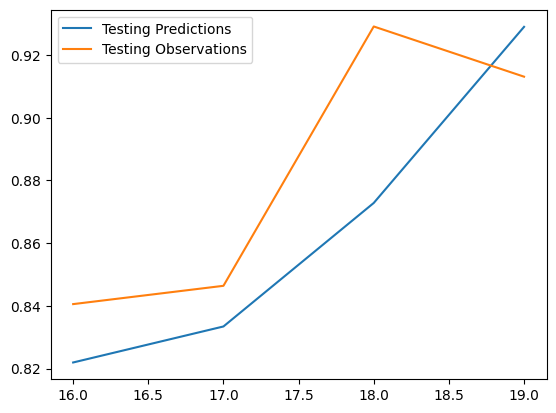

In [56]:
print(X_test.shape)
test_predictions = model.predict(X_test).flatten()

plt.plot(x_ax_test, test_predictions)
plt.plot(x_ax_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

Testing OI PCR of 16 april

In [57]:
arr = [1.2291186913096859,0.9862423212573875,0.7529735544579227,0.729617630007262]
today_test = np.array(arr)
today_test = today_test.reshape((1,4))
print(today_test)
print(today_test.shape)
today_test_predictions = model.predict(today_test)
print('16 apr OIPCR prediction : ', today_test_predictions)
print('actual OIPCR is : 0.92')

[[1.22911869 0.98624232 0.75297355 0.72961763]]
(1, 4)
1/1 [==============================] - 0s 21ms/step
16 apr OIPCR prediction :  [[0.90805984]]
actual OIPCR is : 0.92
